##**Реализация задачи классификации и регрессии с использованием библиотеки Scikit-learn**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Импорт необходимых модулей

In [ ]:
import numpy as np
import os
import pathlib
import tensorflow as tf # используется только для загрузки изображений
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

##**Создание класса.**
Загрузка, предобработка и подготовка данных, обучение модели, оценка модели, визуализация и предсказание класса для нового изображения.

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Загрузка класса: tulips
Загрузка класса: roses
Загрузка класса: daisy
Загрузка класса: sunflowers
Загрузка класса: dandelion


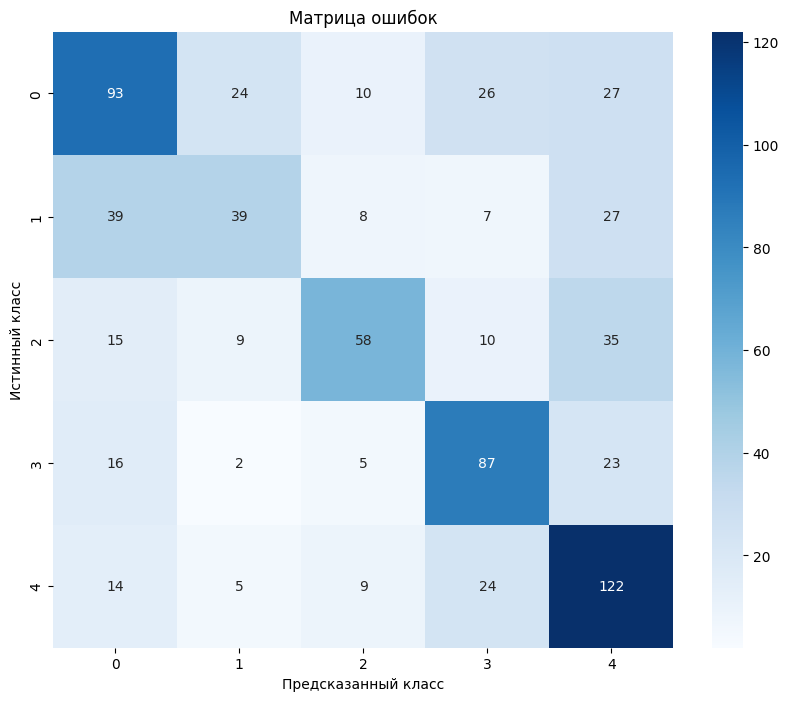

Точность модели: 54.36%

Отчет о классификации:
              precision    recall  f1-score   support

      tulips       0.53      0.52      0.52       180
       roses       0.49      0.33      0.39       120
       daisy       0.64      0.46      0.53       127
  sunflowers       0.56      0.65      0.61       133
   dandelion       0.52      0.70      0.60       174

    accuracy                           0.54       734
   macro avg       0.55      0.53      0.53       734
weighted avg       0.55      0.54      0.54       734

Предсказанный класс: roses с уверенностью 36.00%


In [ ]:

class ImageClassifier:
    def __init__(self, target_size: tuple = (64, 64)):
        self.target_size = target_size
        self.class_names = []
        self.model = None

    def load_and_preprocess_data(self, data_dir: str) -> tuple:
        """
        Загрузка и предобработка данных изображений.
        """
        images = []
        labels = []
        self.class_names = []
        data_dir = pathlib.Path(data_dir)

        for class_dir in data_dir.glob('*'):
            if class_dir.is_dir():
                class_name = class_dir.name
                self.class_names.append(class_name)
                print(f'Загрузка класса: {class_name}')

                for img_path in class_dir.glob('*.jpg'):
                    try:
                        img = Image.open(img_path)
                        img = img.resize(self.target_size)
                        img = img.convert('RGB')
                        img_array = np.array(img).flatten() / 255.0
                        images.append(img_array)
                        labels.append(self.class_names.index(class_name))
                    except Exception as e:
                        print(f'Ошибка при обработке {img_path}: {e}')

        return np.array(images), np.array(labels)

    def train_model(self, X_train: np.ndarray, y_train: np.ndarray):
        """
        Обучение модели Random Forest.
        """
        self.model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
        self.model.fit(X_train, y_train)

    def evaluate_model(self, X_test: np.ndarray, y_test: np.ndarray) -> tuple:
        """
        Оценка модели на тестовых данных.
        """
        y_pred = self.model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, target_names=self.class_names)
        return accuracy, conf_matrix, report

    def predict_image(self, image_path: str) -> tuple:
        """
        Предсказание класса для нового изображения.
        """
        img = Image.open(image_path)
        img = img.resize(self.target_size)
        img = img.convert('RGB')
        img_array = np.array(img).flatten() / 255.0
        img_array = img_array[np.newaxis, :]

        prediction = self.model.predict(img_array)[0]
        probability = self.model.predict_proba(img_array)[0][prediction]

        return self.class_names[prediction], probability * 100

    def plot_results(self, accuracy: float, conf_matrix: np.ndarray, report: str):
        """
        Визуализация результатов.
        """
        # График матрицы ошибок
        plt.figure(figsize=(10, 8))
        sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
        plt.title('Матрица ошибок')
        plt.xlabel('Предсказанный класс')
        plt.ylabel('Истинный класс')
        plt.show()

        # Вывод отчета о классификации
        print(f'Точность модели: {accuracy:.2%}')
        print('\nОтчет о классификации:')
        print(report)

def main():
    # Инициализация классификатора
    classifier = ImageClassifier()

    # Загрузка датасета
    dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
    data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

    # Загрузка и подготовка данных
    X, y = classifier.load_and_preprocess_data(data_dir)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Обучение модели
    classifier.train_model(X_train, y_train)

    # Оценка модели
    accuracy, conf_matrix, report = classifier.evaluate_model(X_test, y_test)
    classifier.plot_results(accuracy, conf_matrix, report)

    # Пример предсказания для нового изображения
    image_path = "/content/2024-10-28 105616.jpg"  # Замените на путь к вашему изображению
    if os.path.exists(image_path):
        prediction, confidence = classifier.predict_image(image_path)
        print(f"Предсказанный класс: {prediction} с уверенностью {confidence:.2f}%")

if __name__ == "__main__":
    main()

Было использовано фото:

 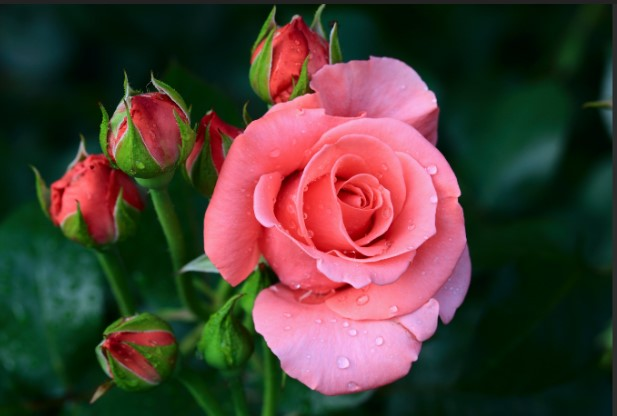

*Рис. 1 "Роза крупным планом"*

###**Анализ работы классификации и регрессии с использованием библиотеки для машинного обучения Scikit-learn (Random Forest):**
**Преимущества:**

  ✅- Быстрое обучение

  ✅- Меньше вычислительных ресурсов

  ✅- Хорошо работает на небольших датасетах

  ✅- Проще в реализации и настройке

**Недостатки:**

  ❎- Ниже точность на задачах компьютерного зрения

  ❎- Теряется пространственная информация при преобразовании изображений в плоские массивы

  ❎- Хуже масштабируется на сложные задачи распознавания

Выбор библиотеки для машинного обучения обычно зависит от:
1. Размера датасета
2. Доступных вычислительных ресурсов
3. Требуемой точности
4. Временных ограничений на обучение
5. Необходимости дальнейшего масштабирования

Точность модели: 54.36%. Очень скромный результат.

Предсказанный класс: roses с уверенностью 36.00%


Библиотека для машинного обучения **Scikit-learn**, позволяет улучшить результаты, если:

✅1. Поэкспериментировать с алгоритмами классификации SVM, Logistic Regression и др.

✅2. Попробовать алгоритмы регрессии Linear Regression, SVR, Decision Trees и др.

✅3. Использовать методы кластеризации K-Means, DBSCAN и др.

✅4. Применить методы снижения размерности PCA, t-SNE

Эти техники являются важными инструментами в современном глубоком обучении, особенно когда мы работаем с небольшими наборами данных, но могут значительно увеличить время обучения.